# Generierung eigener Rhythmen basierend auf Datenanalyse von Schlagzeug Sequenzen durch Markov-Ketten 
### Generating unique rhythms based upon data analysis of drum loops by using Markov chains

Schlagzeug Sequenzen, sogenannte Drum-Loops, sind ein beliebtes Tool in der Musikindustrie: Interpreten können mithilfe dieser Loops selbst Demos erstellen oder ganze Stücke produzieren. Jedoch gestaltet sich die Auswahl als schwierig, wenn man kein versierter Schlagzeuger ist und kaum unterschiedlichen Stilistiken kennt. Das Ziel dieser Arbeit ist es dieses Problem zu lösen und die Auswahl von Schlagzeug Sequenzen zu vereinfachen. Es wird eine Datenbank aus Schlagzeug-Sequenzen erstellt und ein Programm welches diese Sequenzen verarbeitet und mithilfe von Markov-Ketten und des Viterbi-Algorithmus basierend auf der Datenbank künstliche Sequenzen generieren kann. Das [Essentia Framework](https://essentia.upf.edu/) dient hierbei als Grundlage.

Zu allererst importieren wir die benötigten Frameworks:

In [1]:
import markov_groove as mg
from hmmlearn import hmm
from pretty_midi import PrettyMIDI
import IPython
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
sns.set(style="darkgrid")


%load_ext watermark
%watermark -m -n -p numpy,scipy,markov_groove

Tue Sep 08 2020 

numpy 1.18.2
scipy 1.5.2
markov_groove 0.1.0

compiler   : GCC 10.1.0
system     : Linux
release    : 5.8.3-2-MANJARO
machine    : x86_64
processor  : 
CPU cores  : 8
interpreter: 64bit


### Einlesen der Dateien

Nun lesen wir die Dateien ein und definieren unsere Parameter:

In [2]:
# Definiere Parameter:
disco = mg.util.read_audio_files("/home/jan_dev/loops/disco", "*/*.*")
techno = mg.util.read_audio_files("/home/jan_dev/loops/techno", "*/*.*")
ballad_mid = mg.util.read_midi_files("/home/jan_dev/loops/mid_loop/Ballads", "*.mid")
bpm = 125
beats = 8
steps = 128



disco_sequencers, disco_samples = mg.util.create_knowledge_base(
    disco, mg.OnsetAlgorithm.COMPLEX, beats, steps
)
techno_sequencers, techno_samples = mg.util.create_knowledge_base(
    techno, mg.OnsetAlgorithm.COMPLEX, beats, steps
)

ballad_sequencers = [mg.MidiSequencer.from_file(mid) for mid in ballad_mid]

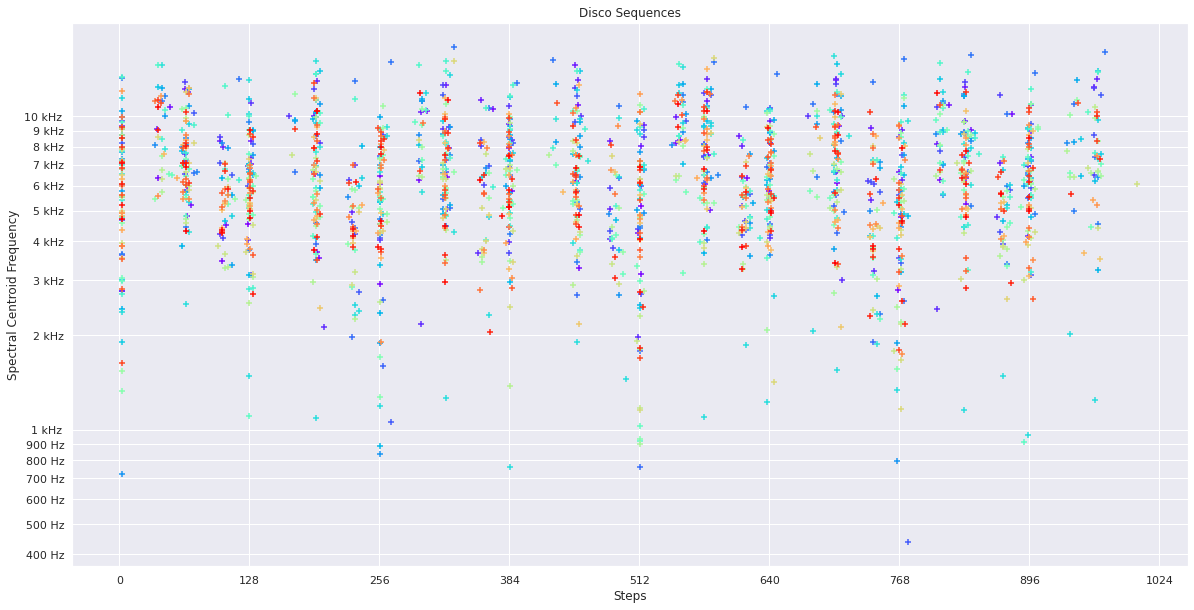

Zeige 85 Sequenzen. Insgesamt 1742 Samples.


In [3]:
# Plot all disco sequences
colors = cm.rainbow(np.linspace(0, 1, len(disco_sequencers)))
_, ax = plt.subplots(figsize=(20, 10))
for sequencer, color in zip(disco_sequencers, colors):
    sequencer.visualize(ax, color)
plt.title("Disco Sequences")
plt.ylabel("Spectral Centroid Frequency")
plt.xlabel("Steps")
plt.show()
print(f"Zeige {len(disco_sequencers)} Sequenzen. Insgesamt {len(disco_samples)} Samples.")

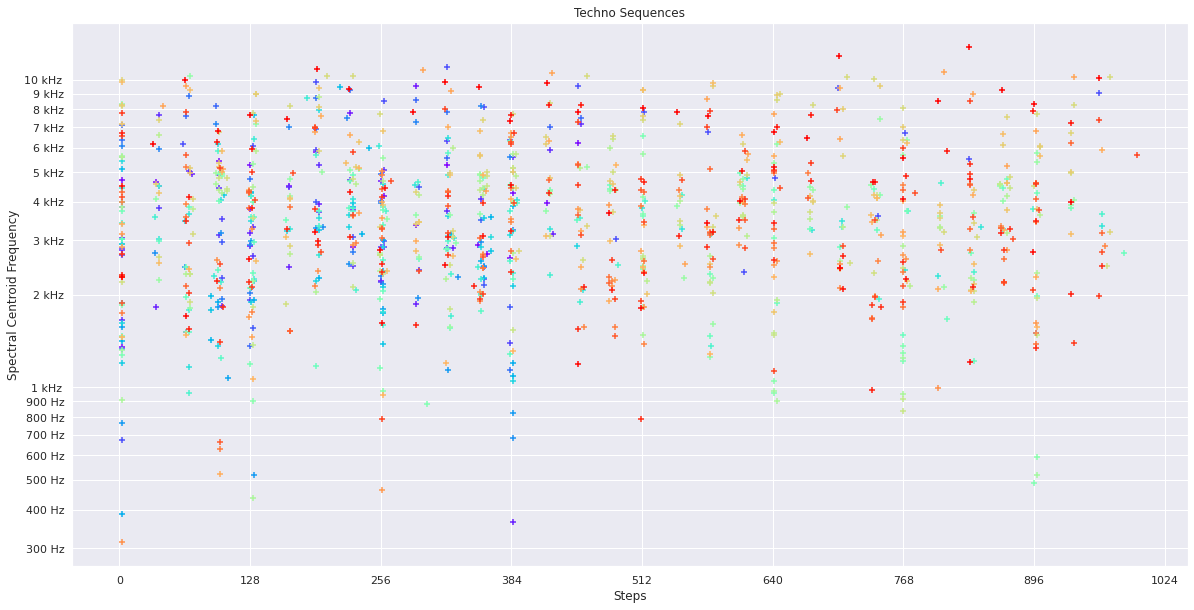

Zeige 68 Sequenzen. Insgesamt 1174 Samples.


In [4]:
# Plot all techno sequences
colors = cm.rainbow(np.linspace(0, 1, len(techno_sequencers)))
_, ax = plt.subplots(figsize=(20, 10))
for sequencer, color in zip(techno_sequencers, colors):
    sequencer.visualize(ax, color)
plt.title("Techno Sequences")
plt.ylabel("Spectral Centroid Frequency")
plt.xlabel("Steps")
plt.show()
print(f"Zeige {len(techno_sequencers)} Sequenzen. Insgesamt {len(techno_samples)} Samples.")

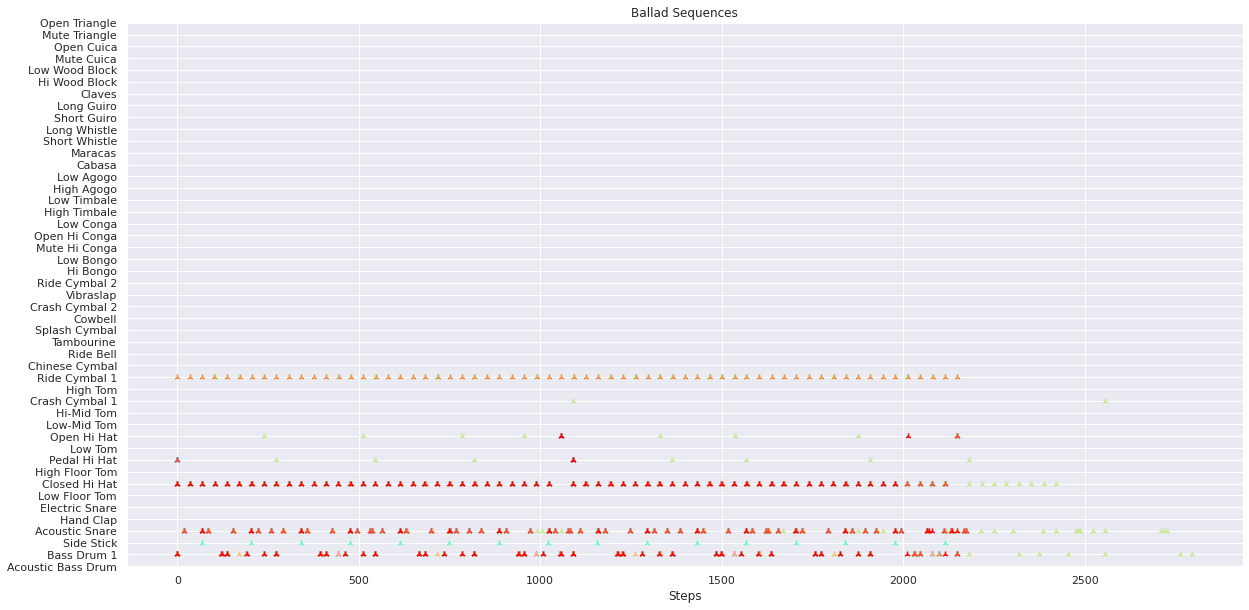

In [5]:
# Plot all ballad sequences
colors = cm.rainbow(np.linspace(0, 1, len(ballad_sequencers)))
_, ax = plt.subplots(figsize=(20, 10))
for sequencer, color in zip(ballad_sequencers, colors):
    sequencer.visualize(ax, color)
plt.title("Ballad Sequences")
plt.xlabel("Steps")
plt.yticks(range(35, 82))
plt.show()

Nun intialisieren das Generative Model:

In [ ]:
disco_hidden_model = hmm.MultinomialHMM(n_components=12, covariance_type="full", n_iter=1000, verbose=True)
disco_hidden_model.fit(np.array([seq.pattern for seq in disco_sequencers]), [len(seq.pattern) for seq in disco_sequencers])

In [8]:
disco_hidden_model = HiddenMarkovModel.from_samples(
    DiscreteDistribution,
    n_components=12,
    X=[seq.encode() for seq in disco_sequencers],
    name="disco",
    verbose=True,
)
techno_hidden_model = HiddenMarkovModel.from_samples(
    DiscreteDistribution,
    n_components=12,
    X=[seq.encode() for seq in techno_sequencers],
    name="techno",
    verbose=True,
)
ballad_hidden_model = HiddenMarkovModel.from_samples(
    DiscreteDistribution,
    n_components=12,
    X=[seq.encode() for seq in ballad_sequencers],
    name="ballad",
    verbose=True,
)

print("Alle Modelle wurden initialisiert und trainiert!")


1378] Improvement: 0.22787442418120918	Time (s): 0.207
[1379] Improvement: 0.22607056677588844	Time (s): 0.2057
[1380] Improvement: 0.22394303532018967	Time (s): 0.2068
[1381] Improvement: 0.22150052549113752	Time (s): 0.2061
[1382] Improvement: 0.21875375043237	Time (s): 0.2145
[1383] Improvement: 0.2157153170919628	Time (s): 0.2115
[1384] Improvement: 0.21239957160287304	Time (s): 0.2048
[1385] Improvement: 0.2088224320596055	Time (s): 0.2041
[1386] Improvement: 0.20500119731514133	Time (s): 0.203
[1387] Improvement: 0.2009543463755108	Time (s): 0.2119
[1388] Improvement: 0.19670132377905247	Time (s): 0.2081
[1389] Improvement: 0.19226232618530048	Time (s): 0.2008
[1390] Improvement: 0.187658078270033	Time (s): 0.2076
[1391] Improvement: 0.18290961711136333	Time (s): 0.2074
[1392] Improvement: 0.17803808273674804	Time (s): 0.2083
[1393] Improvement: 0.17306451149488566	Time (s): 0.2062
[1394] Improvement: 0.16800965290894965	Time (s): 0.2086
[1395] Improvement: 0.1628937863461033	Tim

In [12]:
max(ballad_hidden_sequence)

'51,9.877838275;'

In [46]:
# Genriere neue Sequenz mit HMM
disco_hidden_sequence = disco_hidden_model.sample(length=beats * steps+1)
techno_hidden_sequence = techno_hidden_model.sample(length=beats * steps+1)
ballad_hidden_sequence = ballad_hidden_model.sample(length=3000)
print("HMM Sequenzen wurden generiert!")

# Kreiere neue Sequencer
new_disco_seq =  mg.AudioSequencer.decode(disco_hidden_sequence, bpm, beats, steps)
new_disco_beat_samples = [disco_samples[freq] for _, freq in new_disco_seq.pattern if not np.isnan(freq)]

new_techno_seq =  mg.AudioSequencer.decode(techno_hidden_sequence, bpm, beats, steps)
new_techno_beat_samples = [techno_samples[freq] for _, freq in new_techno_seq.pattern if not np.isnan(freq)]

new_ballad_seq = mg.MidiSequencer.decode(ballad_hidden_sequence)

# Kreiere neue Schlagzeugsequenzen
disco_beat =  new_disco_seq.create_beat(samples=new_disco_beat_samples)
techno_beat =  new_techno_seq.create_beat(samples=new_techno_beat_samples)
ballad_beat = new_ballad_seq.create_beat()
print("Schlagzeugsequenzen erstellt!")

HMM Sequenzen wurden generiert!
Schlagzeugsequenzen erstellt!


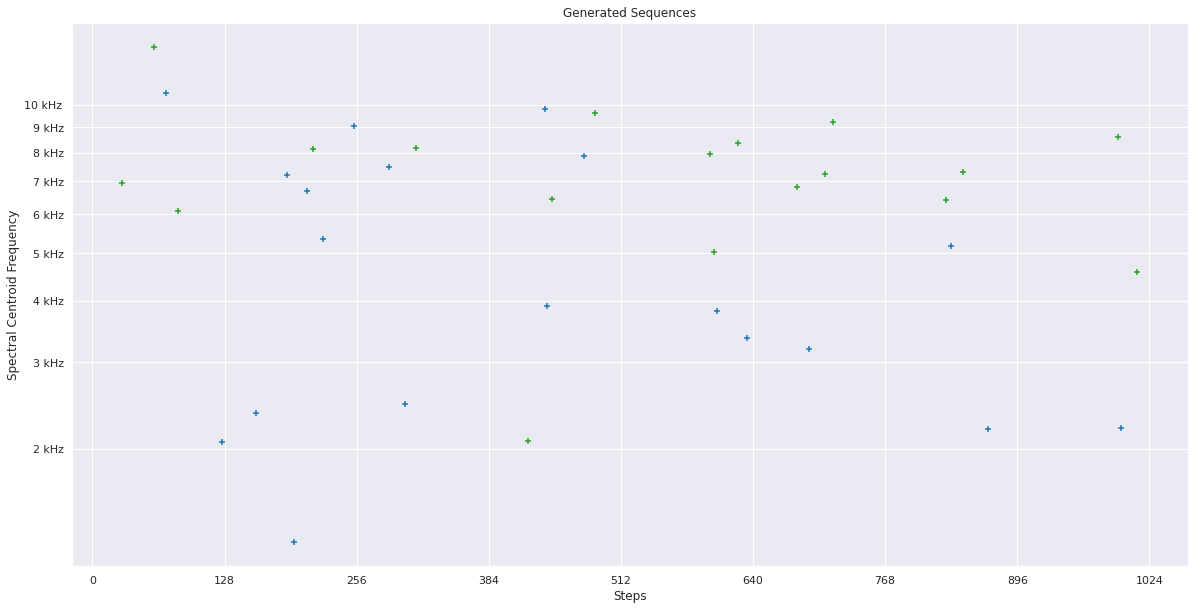

In [47]:
# Plot newly created sequences
_, ax = plt.subplots(figsize=(20, 10))
new_disco_seq.visualize(ax, "tab:green")
new_techno_seq.visualize(ax, "tab:blue")
plt.title("Generated Sequences")
plt.ylabel("Spectral Centroid Frequency")
plt.xlabel("Steps")
plt.show()

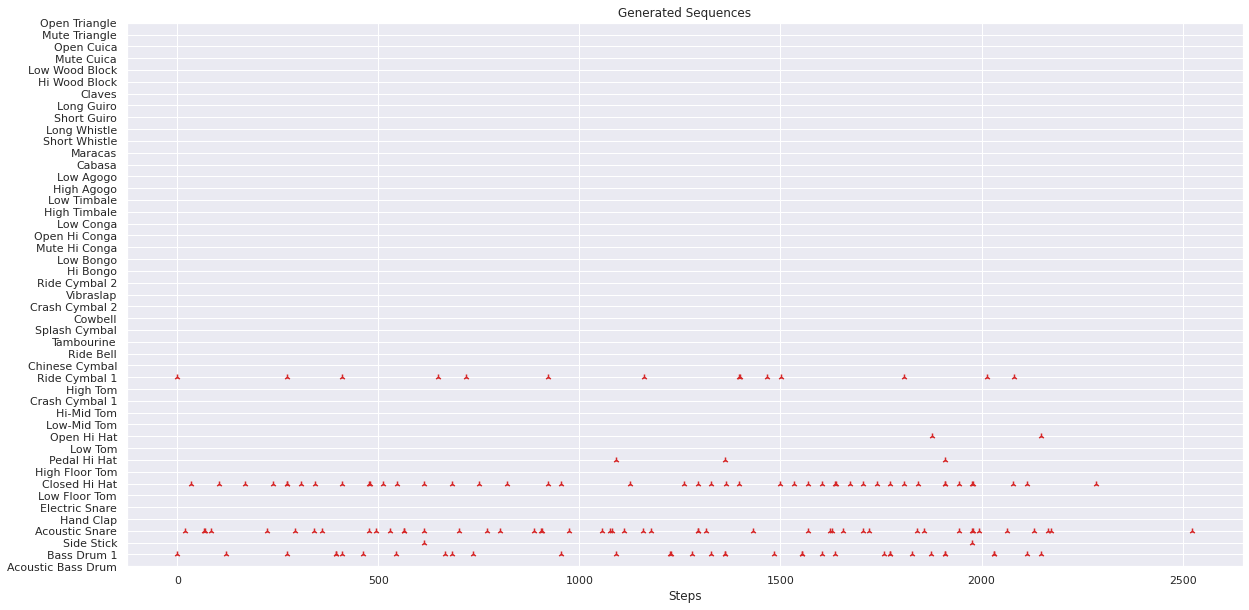

In [48]:
# Plot newly created sequences
_, ax = plt.subplots(figsize=(20, 10))
new_ballad_seq.visualize(ax, "tab:red")
plt.title("Generated Sequences")
plt.xlabel("Steps")
plt.yticks(range(35, 82))
plt.show()

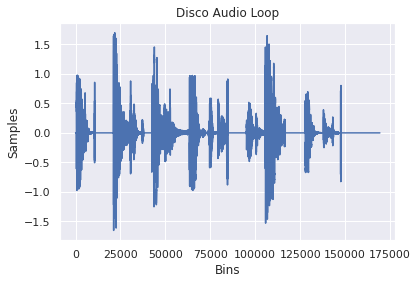

In [49]:
plt.plot(disco_beat.audio)
plt.title("Disco Audio Loop")
plt.ylabel("Samples")
plt.xlabel("Bins")
plt.show()

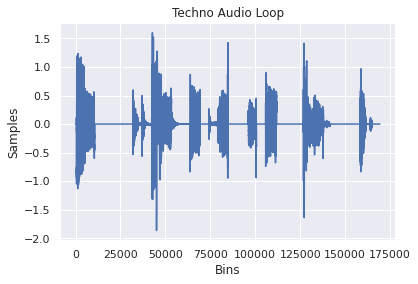

In [50]:
plt.plot(techno_beat.audio)
plt.title("Techno Audio Loop")
plt.ylabel("Samples")
plt.xlabel("Bins")
plt.show()

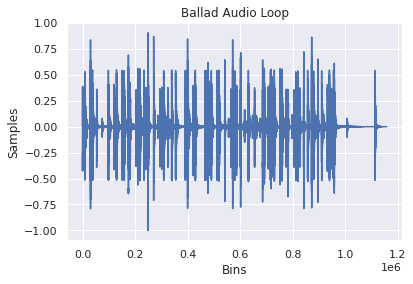

In [51]:
plt.plot(ballad_beat.audio)
plt.title("Ballad Audio Loop")
plt.ylabel("Samples")
plt.xlabel("Bins")
plt.show()

In [52]:
disco_beat.save(Path(".temp/disco_audio.wav"))
techno_beat.save(Path(".temp/techno_audio.wav"))
ballad_beat.save(Path(".temp/ballad_audio.wav"))
print("Dateien abgespeichert!")

Dateien abgespeichert!


In [24]:
IPython.display.Audio(data=disco_beat.audio, rate=disco_beat.sample_rate, autoplay=True)

In [23]:
IPython.display.Audio(data=techno_beat.audio, rate=techno_beat.sample_rate, autoplay=True)

In [22]:
ballad_beat.display()